# Block 1: От нейрона к полносвязной сети

Каждый нейрон вычисляет принимает на вход некоторый вектор активности других нейронов $x$, взвешивает их с помощью своих внутренних весов в виде  $W$ и сдвига (bias) $b$, и добавляет на выходе нелинейность:
$$z =  f(W x + b)$$  
Рассмотрим различные функции активации, которые популярны в нейронных сетях:

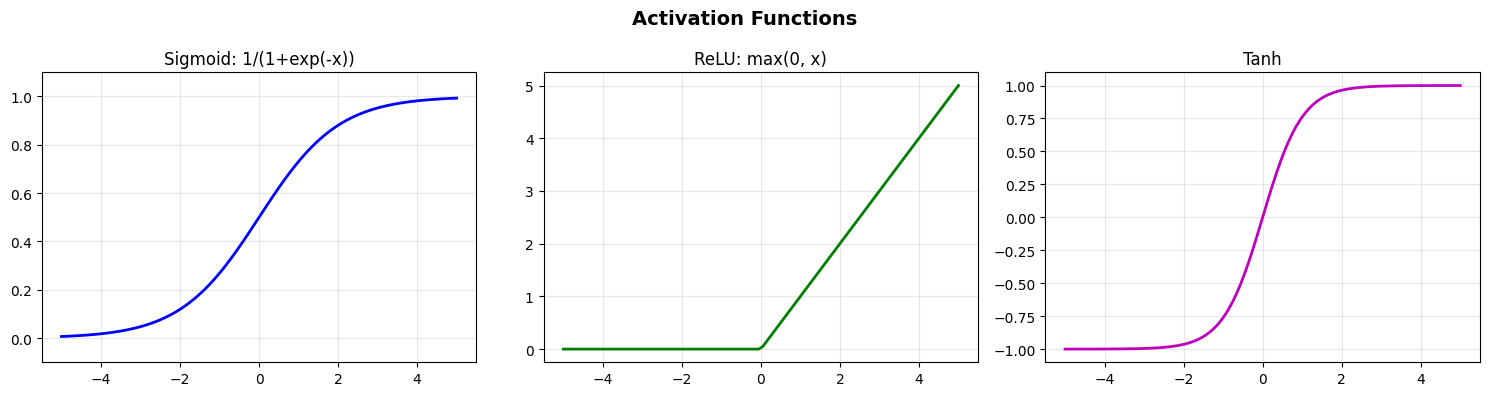

Активационные функции добавляют нелинейность!


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(x, sigmoid(x), 'b-', linewidth=2)
axes[0].set_title('Sigmoid: 1/(1+exp(-x))')
axes[0].set_ylim(-0.1, 1.1)
axes[0].grid(True, alpha=0.3)

axes[1].plot(x, relu(x), 'g-', linewidth=2)
axes[1].set_title('ReLU: max(0, x)')
axes[1].grid(True, alpha=0.3)

axes[2].plot(x, tanh(x), 'm-', linewidth=2)
axes[2].set_title('Tanh')
axes[2].set_ylim(-1.1, 1.1)
axes[2].grid(True, alpha=0.3)

plt.suptitle('Activation Functions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Активационные функции добавляют нелинейность!")

## 1) Двуслойная нейронная сеть

Рассмотрим модель двуслойной нейронной сети, т.е. нейронную сеть с одним скрытым слоем. Здесь в качестве функции нелинейности в скрытом слоей используется гиперболический тангенс, а в выходном нейроне используется сигмоида.

**Вот наша модель**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Математически**:

Для одного примера $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & if a^{[2](i)} > 0.5 \\ 0 & otherwise \end{cases}\tag{5}$$

Зная правильные ответы для всех примеров, можно вычислить потери (или ошибку предсказания) $J$ следующим образом:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Напоминание**. Общая методология построения нейронной сети заключается в следующем:
 1. Определите структуру нейронной сети (количество входных блоков, количество скрытых блоков и т. д.).
 2. Инициализируйте параметры модели.
 3. Цикл:
 - Реализация прямого распространения
 - Вычислить потери
 - Реализуйте обратное распространение, чтобы получить градиенты.
 - Обновление параметров (градиентный спуск)

## 2) Обратное распространение ошибки

**Инструкции**:  
Обратное распространение ошибки обычно является самой сложной (наиболее математической) частью глубокого обучения. В помощь вам привожу слайд из лекции по обратному распространению ошибки. Вам понадобится использовать шесть уравнений в правой части этого слайда, поскольку вы создаете векторизованную реализацию.

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Обратите внимание, что $*$ обозначает поэлементное умножение.
- Обозначения, которые вы будете использовать, распространены в программировании глубокого обучения:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Совет:  
Чтобы вычислить dZ1, вам нужно вычислить $g^{[1]'}(Z^{[1]})$. Поскольку $g^{[1]}(.)$ — функция активации `tanh`, $a = g^{[1]}(z)$, то $g^{[1]'}(z) = 1- а^2$. Таким образом, вы можете вычислить $g^{[1]'}(Z^{[1]})$ используя `(1 - np.power(A1, 2))`.

## 3) Градиентный спуск
Градиентный спуск используется для обновления весов нейронной сети. 

Используйте градиентный спуск. Вам необходимо использовать (dW1, db1, dW2, db2) для обновления (W1, b1, W2, b2).

**Общее правило градиентного спуска**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$, где $\alpha$ — скорость обучения, а $\theta$ — параметр.

**Иллюстрация**: Алгоритм градиентного спуска с хорошей скоростью обучения (сходимость) и плохой скоростью обучения (расхождение). Изображения любезно предоставлены Адамом Харли.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">


## 4) Рассмотрим два примера
### 4.1) Задача XOR

Таблица истинности для операции XOR выглядит следующим образом:  
0 XOR 0 = 0  
0 XOR 1 = 1  
1 XOR 0 = 1  
1 XOR 1 = 0  

Единичный нейрон не может решить задачу XOR, поскольку у него линейная разделяющая поверхность.  
Однако нейронная сеть с одним скрытым слоем может!

Для удобства реализуем всю нейронную сеть в виде одного класса.

In [14]:
class NeuralNetwork:
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        '''инициализация параметров'''
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        self.loss_history = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward(self, X):
        '''forward_pass'''
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate=0.5):
        '''backward_pass'''
        m = X.shape[0]
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def train(self, X, y, epochs=10000, learning_rate=0.5, verbose=1000):
        print(f"Training: {epochs} epochs")
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.compute_loss(y, output)
            self.loss_history.append(loss)
            self.backward(X, y, learning_rate)
            if epoch % verbose == 0:
                accuracy = np.mean((output > 0.5) == y) * 100
                print(f"Epoch {epoch:5d}: Loss = {loss:.4f}, Accuracy = {accuracy:.1f}%")
        print("Training completed!")
    
    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int), output

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

print("XOR dataset:")
print("X0 X1 | Y")
for i in range(len(X)):
    print(f"{X[i][0]}  {X[i][1]}  | {y[i][0]}")

XOR dataset:
X0 X1 | Y
0  0  | 0
0  1  | 1
1  0  | 1
1  1  | 0


In [15]:
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

print("Architecture: 2 inputs -> 2 hidden -> 1 output")
print("Total parameters:", 2*2 + 2 + 2*1 + 1)
print()

nn.train(X, y, epochs=10000, learning_rate=0.5, verbose=1000)

Architecture: 2 inputs -> 2 hidden -> 1 output
Total parameters: 9

Training: 10000 epochs
Epoch     0: Loss = 0.7086, Accuracy = 50.0%
Epoch  1000: Loss = 0.1352, Accuracy = 100.0%
Epoch  2000: Loss = 0.0187, Accuracy = 100.0%
Epoch  3000: Loss = 0.0096, Accuracy = 100.0%
Epoch  4000: Loss = 0.0064, Accuracy = 100.0%
Epoch  5000: Loss = 0.0048, Accuracy = 100.0%
Epoch  6000: Loss = 0.0038, Accuracy = 100.0%
Epoch  7000: Loss = 0.0032, Accuracy = 100.0%
Epoch  8000: Loss = 0.0027, Accuracy = 100.0%
Epoch  9000: Loss = 0.0024, Accuracy = 100.0%
Training completed!


In [16]:
print("Results on training data:")
print("="*40)
predictions, probabilities = nn.predict(X)
for i in range(len(X)):
    correct = "YES" if predictions[i][0] == y[i][0] else "NO"
    print(f"{X[i]} | True: {y[i][0]} | Pred: {probabilities[i][0]:.4f} | {correct}")

accuracy = np.mean(predictions == y) * 100
print("="*40)
print(f"Final accuracy: {accuracy:.1f}%")

Results on training data:
[0 0] | True: 0 | Pred: 0.0018 | YES
[0 1] | True: 1 | Pred: 0.9977 | YES
[1 0] | True: 1 | Pred: 0.9977 | YES
[1 1] | True: 0 | Pred: 0.0020 | YES
Final accuracy: 100.0%


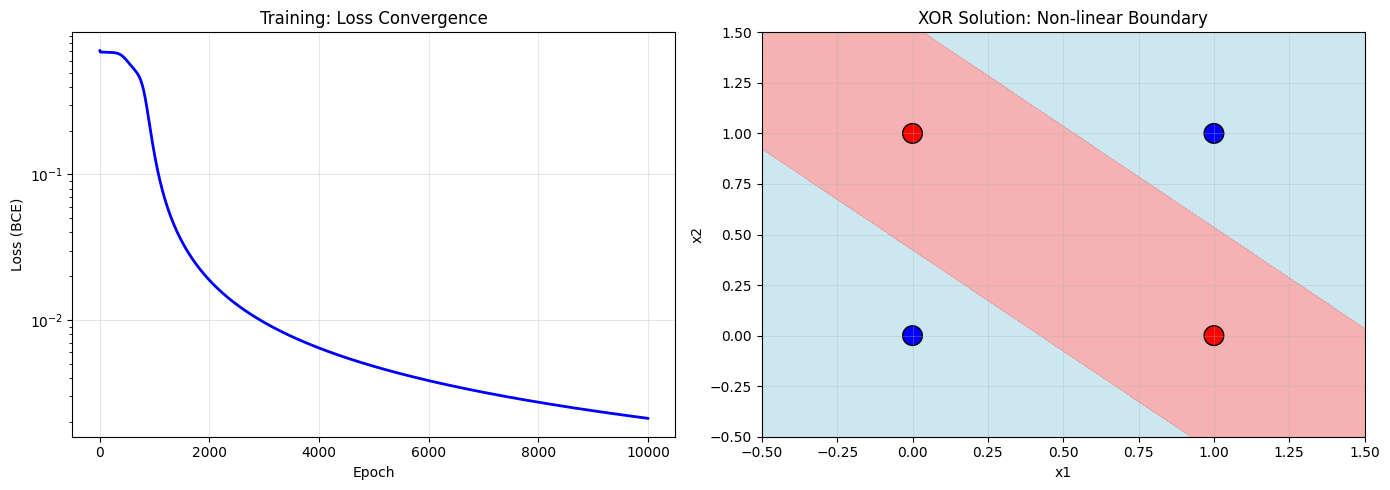

Neural network solved XOR!
Hidden layer adds non-linearity missing in linear model.


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(nn.loss_history, linewidth=2, color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (BCE)')
axes[0].set_title('Training: Loss Convergence')
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

x1_range = np.linspace(-0.5, 1.5, 100)
x2_range = np.linspace(-0.5, 1.5, 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

Z, _ = nn.predict(grid)
Z = Z.reshape(xx1.shape)

axes[1].contourf(xx1, xx2, Z, levels=1, colors=['lightblue', 'lightcoral'], alpha=0.6)
axes[1].scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolors='black', s=200)
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].set_title('XOR Solution: Non-linear Boundary')
axes[1].set_xlim(-0.5, 1.5)
axes[1].set_ylim(-0.5, 1.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Neural network solved XOR!")
print("Hidden layer adds non-linearity missing in linear model.")

### 4.2) Ещё один пример на плоскости

Следующий код загрузит набор данных двух классов «цветок» в переменные `X` и `Y`:

The shape of X is: (400, 2)
The shape of Y is: (400, 1)
I have m = 400 training examples!


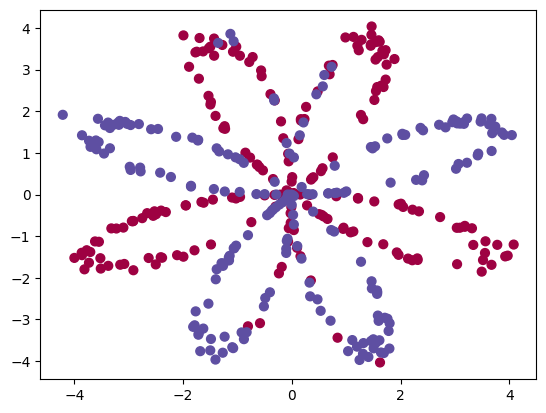

In [22]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

X, Y = load_planar_dataset()
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = len(Y)  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

**Простая логистическая регрессия**

Прежде чем строить полную нейронную сеть, давайте сначала посмотрим, как логистическая регрессия справляется с этой задачей. Для этого вы можете использовать встроенные функции sklearn. Запустите приведенный ниже код, чтобы обучить классификатор логистической регрессии на наборе данных.

In [24]:
import sklearn
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegression();
clf.fit(X, Y.ravel());

In [46]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


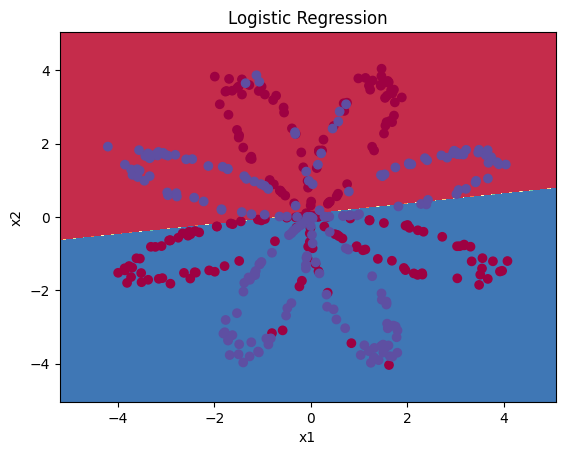

In [27]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y.ravel(), LR_predictions) + np.dot(1-Y.ravel(), 1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Интерпретация**: набор данных не является линейно разделимым, поэтому логистическая регрессия работает неэффективно. Надеюсь, нейронная сеть справится лучше. Давайте попробуем это!

Поскольку входные данные по-прежнему являются двумерными, то не будем менять архитектуру нейронной сети.

In [32]:
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)

print("Architecture: 2 inputs -> 2 hidden -> 1 output")
print("Total parameters:", 2*2 + 2 + 2*1 + 1)
print()

nn.train(X, Y, epochs=10000, learning_rate=1, verbose=1000)

Architecture: 2 inputs -> 2 hidden -> 1 output
Total parameters: 9

Training: 10000 epochs
Epoch     0: Loss = 0.7437, Accuracy = 49.5%
Epoch  1000: Loss = 0.3181, Accuracy = 88.8%
Epoch  2000: Loss = 0.2992, Accuracy = 88.8%
Epoch  3000: Loss = 0.2906, Accuracy = 89.2%
Epoch  4000: Loss = 0.2851, Accuracy = 89.8%
Epoch  5000: Loss = 0.2810, Accuracy = 89.8%
Epoch  6000: Loss = 0.2777, Accuracy = 90.0%
Epoch  7000: Loss = 0.2750, Accuracy = 90.0%
Epoch  8000: Loss = 0.2726, Accuracy = 90.0%
Epoch  9000: Loss = 0.2706, Accuracy = 90.0%
Training completed!


Accuracy of logistic regression: 90 % (percentage of correctly labelled datapoints)


C:\Users\Iakov\AppData\Local\Temp\ipykernel_3828\2557839497.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y.ravel(), LR_predictions) + np.dot(1-Y.ravel(), 1-LR_predictions))/float(Y.size)*100) +


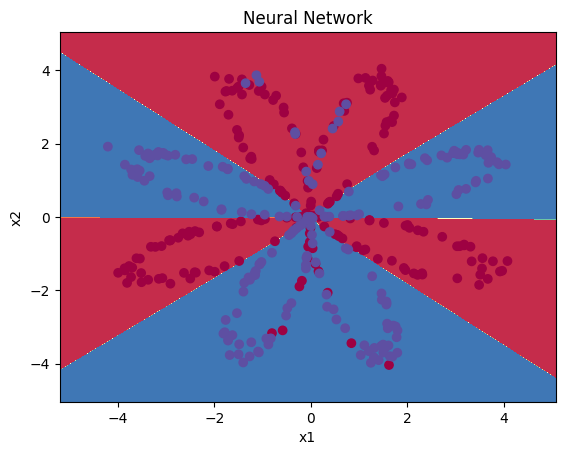

In [53]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: nn.predict(x)[0], X, Y.ravel())
plt.title("Neural Network")

# Print accuracy
LR_predictions = nn.predict(X)[0]
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y.ravel(), LR_predictions) + np.dot(1-Y.ravel(), 1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")